# Linear Regression from Scratch using Python

In this notebook, I will build a linear regression model from scratch using only Python, without relying on built-in linear regression libraries. This model will be used to Median House value from the California housing prices dataset (https://www.kaggle.com/datasets/camnugent/california-housing-prices).

**Objectives:**
* To comprehend the underlying theory of Linear Regression, including the mathematical foundations and different approach methods.
* To develop a Simple Linear Regression model from scratch using both Ordinary Least Squares (OLS) and Gradient Descent (GD) without relying on built-in Machine Learning libraries.
* To apply our Linear Regression model for predicting median house values using the California Housing dataset.
* To analyze and compare both approaches to determine which method is more effective and suitable for different scenarios.

In [1]:
# Import python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## How Linear Regression Works: Theory and Code

### Theory Behind Linear Regression
Linear Regression is a fundamental statistical method used to model the relationship between a dependent variable (𝑦) and one or more independent variables (𝑋). It assumes a linear relationship between the variables and aims to find the best-fitting line that minimizes the error between the actual and predicted values.

**Linear Equation:** 

$$
𝑦 = m𝑋 + b
$$

Where, 
* $y$ = is the dependant variable (target)
* $b$ = is the Y intercept (bias)
* $m$ = is the slope (coefficient)
* $X$ = is the independant variable (feature)

In [2]:
# function to return the outcome variable using the linear equation
def linear_equation(X, m, b):
    '''
    Returns the outcome variables of X using the linear equation.
    '''
    Y = [b+m*x for x in X]
    return Y

There are two methods to build a linear regression model:
* Ordinary Least Squares (OLS)
* Gradient Descent

## Ordinary Least Squares (OLS method)

The Ordinary Least Squares (OLS) method is a mathematical approach used to find the best-fitting line by minimizing the error between actual and predicted values. Instead of using gradient descent, OLS provides a direct solution for calculating the slope (𝑚) and intercept (𝑏).

**Slope (𝑚):**
$$
m = \frac{\sum_{i=1}^n(X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^n(X_i - \bar{X})^2}
$$

* The numerator calculates the covariance between 𝑋 and 𝑦.
* The denominator computes the variance of 𝑋.
* The fraction represents how much 𝑦 changes for a unit change in 𝑋.

**Intercept:** 
$$
    b=\bar{y}−m\bar{X}
$$

* After computing 𝑚, we substitute it into the equation $𝑦=𝑚*𝑋+𝑏$.
* Rearranging gives $𝑏=\hat{𝑦}-𝑚\hat{𝑋}$, ensuring the regression line passes through the mean of 𝑋 and 𝑦.

Where,
* $\bar{X}$ = Mean of X values
* $\bar{y}$ = Mean of y values

In [3]:
# function to return the b intercept
def intercept(X, Y, m):
    '''
    Returns the intercept b.
    '''
    # find the mean of the sets
    x_ = np.mean(X)
    y_ = np.mean(Y)
    
    # calculate the intercept
    b = y_ - m * x_
    
    return b

In [4]:
# function to return the b1 co-eff / slope
def slope(X, Y):
    '''
    Returns the slope between the X and Y values.
    '''
    # find the mean of the sets
    x_ = np.mean(X)
    y_ = np.mean(Y)
    
    # calculate dX and dY
    dy = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)]) # numerator
    dx = sum([(x-x_)**2 for x,y in zip(X,Y)]) # denominator
    
    # calculate slope
    slope = dy/dx
    
    return slope

## Gradient Descent method

Gradient Descent is an iterative optimization technique used to minimize the Mean Squared Error (MSE) by adjusting the slope (𝑚) and intercept (𝑏).

**Mean Squared Error (MSE):**

$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2
$$

Where:
* $\mathrm{MSE}$	=	mean squared error
* ${n}$	=	number of data points
* $Y_{i}$	=	observed values
* $\hat{Y}_{i}$	=	predicted values

**Compute the Gradient:**

The updates for 𝑚 and 𝑏 are calculated using the partial derivatives:

for m (slope):
$$
\mathrm{\frac{∂L}{∂m}} = \frac{2}{n}\sum_{i=1}^nX_i(\hat{Y}_{i}- Y_i))
$$
for b (intercept):
$$
\mathrm{\frac{∂L}{∂b}} = \frac{2}{n}\sum_{i=1}^n(\hat{Y}_{i}- Y_i)
$$

**Update the Parameters:**

Updates parameters using the learning rate:

for m (slope):
$$
m = m - α . \frac{∂L}{∂m}
$$

for b (slope):
$$
b = b - α . \frac{∂L}{∂b}
$$

Where:

* 𝛼 = learning rate (controls how big the steps are).
* 𝑛 = number of data points.
* $\hat{Y}_{i}=𝑚𝑋+𝑏$ is the predicted output.

In [5]:
# initialize the parameters for training the model
learning_rate = 0.001
num_epoch = 1000

In [6]:
# create a function to perform the training using gradient descent
def gradient_descent(X, y):
    '''
    finds the slope, intercept; calculates the adjustments for the mentioned epochs and returns the learned slope and intercept using gradient descent.
    '''
    m = slope(X, y)
    b = intercept(X, y, m)
    n = len(X)
    
    for _ in range(num_epoch):
        y_pred = m * X + b  # Predicted values
        error = y_pred - y  # Difference between predicted and actual

        # Compute gradients
        dm = (2/n) * np.sum(X * error)
        db = (2/n) * np.sum(error)
        
        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

    return (m, b)

## California housing Dataset EDA

About this dataset:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [7]:
data = pd.read_csv("data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# check for null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
# check duplicate values
data.duplicated().sum()

np.int64(0)

Let's numerize the `ocean_proximity` column

In [14]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [15]:
data['ocean_proximity'] = data['ocean_proximity'].map({'<1H OCEAN' : 0, 'INLAND' : 1, 'NEAR OCEAN' : 2, 'NEAR BAY' : 3, 'ISLAND' : 4})

**optional:** rearranging the columns to have the target column at the end

In [16]:
columns_list = data.columns
columns_list

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [17]:
columns_titles = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity', 'median_house_value']

In [18]:
data = data.reindex(columns=columns_titles)

**Correlation matrix**

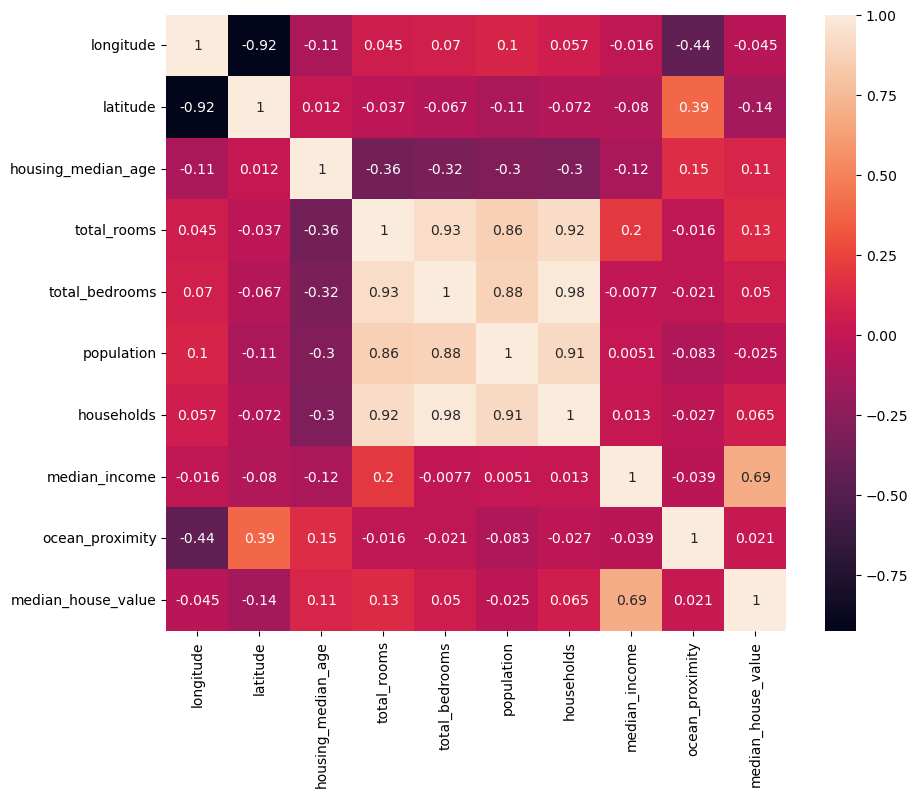

In [19]:
# plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

let use the median_income column for our model as it has the highest correlation.

## Train-test split

In [20]:
len(data)

20433

 Since we dont need 20,000 values lets reduce the data.

In [21]:
# create a df with 'median_income' and the 'median_house_value' column only
df = pd.DataFrame(data[['median_income', 'median_house_value']])

# Shuffle dataframe using sample function
df = df.sample(frac=1)

In [22]:
size = 2000
X = data['median_income'][:size]
y = data['median_house_value'][:size]

Let's plot a scatter plot to visualize the data

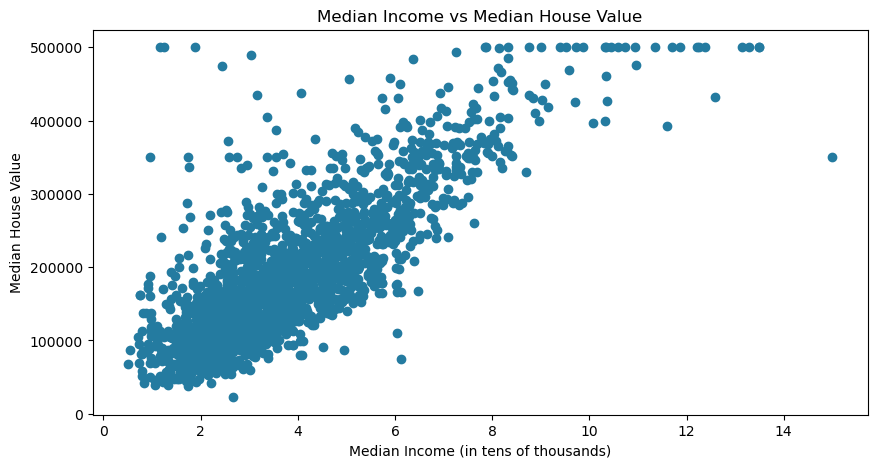

In [23]:
# plot a scatter plot between the median income and the median house value
plt.figure(figsize=(10,5))
plt.title("Median Income vs Median House Value")
plt.scatter(X, y, color = "#247ba0")
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value')
plt.show()

In [24]:
# defining a ratio to split the data
ratio = 0.75
 
total_rows = X.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
X_train = X[0:train_size]
X_test = X[train_size:]
y_train = y[0:train_size]
y_test = y[train_size:]

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1500, 500, 1500, 500)

## Performing Predictions

Now, we will use the functions that we previously created to perform the predictions

In [26]:
slp = slope(X_train, y_train)
bias = intercept(X_train, y_train, slp)
preds_ols = linear_equation(X_test, slp, bias)

In [28]:
m_b = gradient_descent(X_train, y_train)
m = m_b[0]
b = m_b[1]
preds_gs = linear_equation(X_test, m, b)

Let's plot the same graph we plot earlier and draw the line that holds our predictions

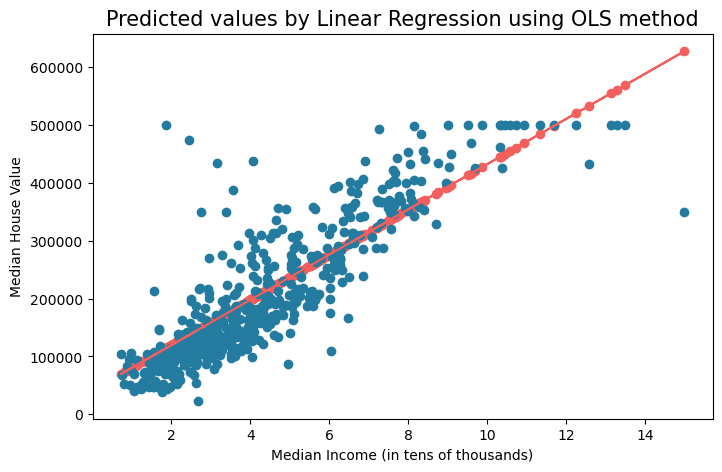

In [50]:
plt.figure(figsize = (8, 5))
plt.plot(X_test, preds_ols, color = '#f25f5c')
plt.scatter(X_test, preds_ols, color = '#f25f5c')
plt.title('Predicted values by Linear Regression using OLS method', fontsize = 15)
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value')
plt.scatter(X_test, y_test, color = "#247ba0")
plt.show()

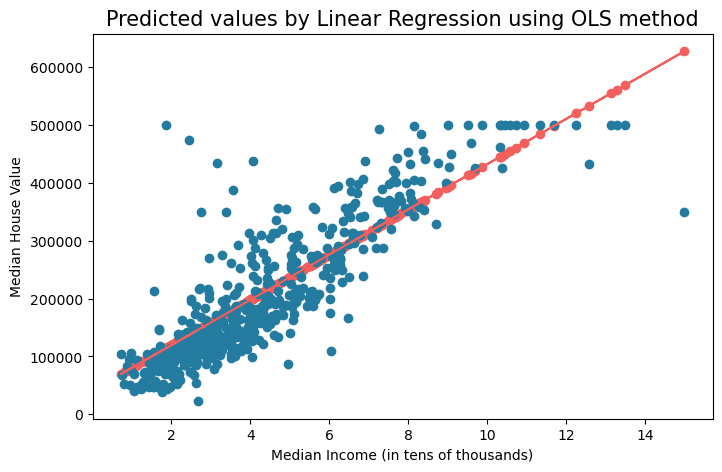

In [27]:
plt.figure(figsize = (8, 5))
plt.plot(X_test, preds_ols, color = '#f25f5c')
plt.scatter(X_test, preds_ols, color = '#f25f5c')
plt.title('Predicted values by Linear Regression using OLS method', fontsize = 15)
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value')
plt.scatter(X_test, y_test, color = "#247ba0")
plt.show()

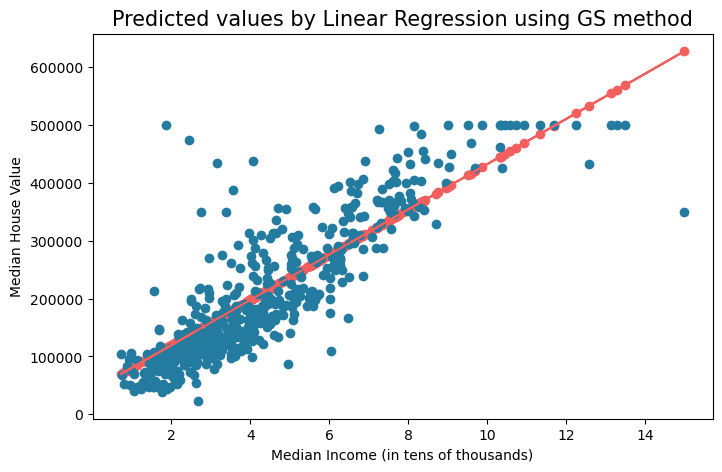

In [29]:
plt.figure(figsize = (8, 5))
plt.plot(X_test, preds_gs, color = '#f25f5c')
plt.scatter(X_test, preds_gs, color = '#f25f5c')
plt.title('Predicted values by Linear Regression using GS method', fontsize = 15)
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value')
plt.scatter(X_test, y_test, color = "#247ba0")
plt.show()

## Evaluation

Comparing the slope and the intercept found by each methods

In [54]:
print("OLS slope: ", slp)
print("GS slope: ", m)

OLS slope:  39102.31464010189
GS slope:  39102.31464010189


In [56]:
print("OLS intercept: ", bias)
print("GS intercept: ", b)

OLS intercept:  41288.73305409381
GS intercept:  41288.73305409381


In [30]:
# create a function to return the error 
def err_func(y_true, y_pred):
    '''
    Calculates and dsiplays the Mean error, Squared error, Mean squared error and Root mean squared error.
    '''
    N = len(y_true) # length of the sample
    e = np.sum(y_pred - y_true) # Average mean error
    se = e*e # squared error
    mse = (1/N) * se # mean squared error
    rmse = np.sqrt(mse) # root mean squared error

    # diplsay the errors
    print("Avg Error: ", e)
    print("Squared Error: ", se)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)

In [31]:
err_func(y_test, preds_ols)

Avg Error:  2809364.8864339073
Squared Error:  7892531065127.801
Mean Squared Error:  15785062130.255602
Root Mean Squared Error:  125638.61719334387


In [32]:
err_func(y_test, preds_gs)

Avg Error:  2809364.8864339073
Squared Error:  7892531065127.801
Mean Squared Error:  15785062130.255602
Root Mean Squared Error:  125638.61719334387


Let's check the accuracy by creating a custom r squared function

In [33]:
# Create a function to find tthe r squared value
def r_squared(y_true, y_preds):
    '''
    Returns the R squared value.
    '''
    sse, r_sqr = [0], [0]
    
    y_ = np.mean(y_true)
    
    sse = sum([(y - pred)**2 for y,pred in zip(y_true, y_preds)]) # Squared sum of error
    sst = sum([(y - y_)**2 for y in y_true]) # total squared sum
    
    r_sqr = 1 - (sse / sst)
    
    return r_sqr

In [34]:
r_squared(y_test, preds_ols)

np.float64(0.7365306157195761)

In [35]:
r_squared(y_test, preds_gs)

np.float64(0.7365306157195761)

We get the same **73.65%** accuracy for our simple linear regression model using both aproaches. Now, let's compare it with scikit-learn's LinearRegression model

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X_train_reshaped = np.array(X_train).reshape((-1, 1))
reg.fit(X_train_reshaped, y_train)

X_test_reshaped = np.array(X_test).reshape((-1, 1))
reg.score(X_test_reshaped, y_test)

0.7365306157195763

The R squared value is same!

## Summary and Conclusion

In this notebook, we built a simple linear regression model from scratch using Python. We first explored the mathematical foundations, implemented functions to perform the necessary computations, and designed the model to adjust the slope and intercept based on error minimization. We then used our model to predict median housing values from the California housing dataset. Upon evaluation, we found that our implementation performs identically to Scikit-learn’s LinearRegression model.

Reflecting on our objectives, we successfully covered all key aspects of linear regression. In the How Linear Regression Works: Theory and Code section, we broke down the mathematical concepts, discussed the two approaches and implemented the corresponding Python code. Using these foundations, we developed a model that trained on a dataset, adjusted its parameters accordingly, and made predictions on test data. Finally, we applied our model to predict housing prices, achieving our intended goals.

It is important to note that this model is not optimized for production use and cannot outperform Scikit-learn’s LinearRegression. However, this notebook serves as an educational resource, providing a clear understanding of linear regression’s inner workings and mathematical structure